In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
%matplotlib inline

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
print(df.columns)
print(df.dtypes)
print(df.shape)

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')
Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object
(26406, 10)


In [13]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

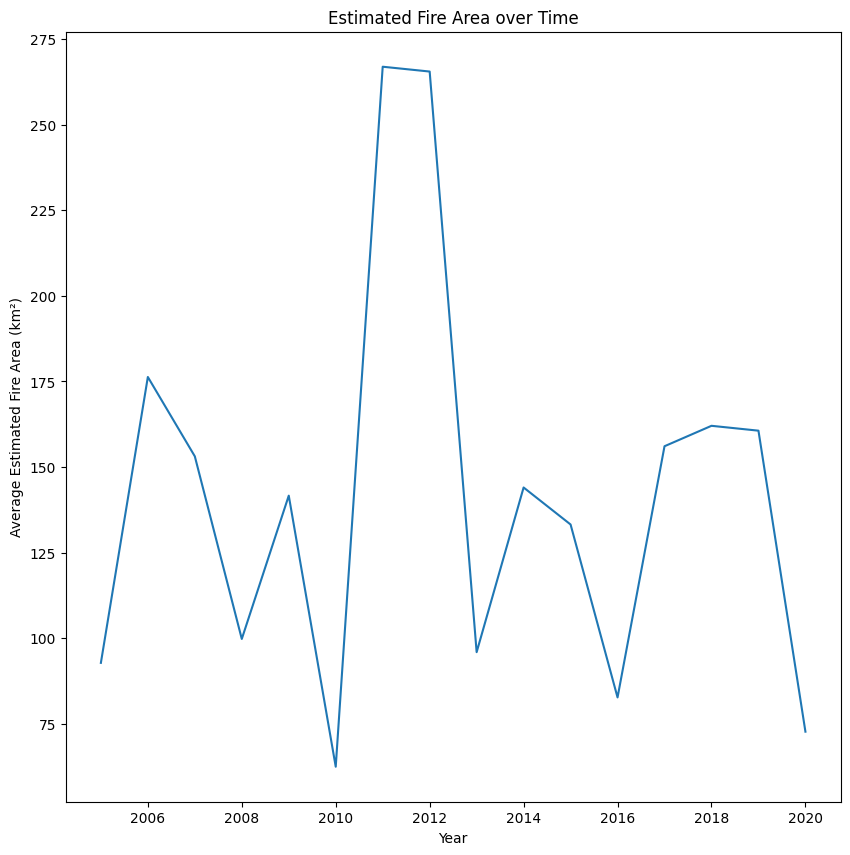

In [34]:
#1.1
plt.figure(figsize=(10,10))
df_group = df.groupby('Year')["Estimated_fire_area"].mean()
df_group.plot(x=df_group.index, y=df_group.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

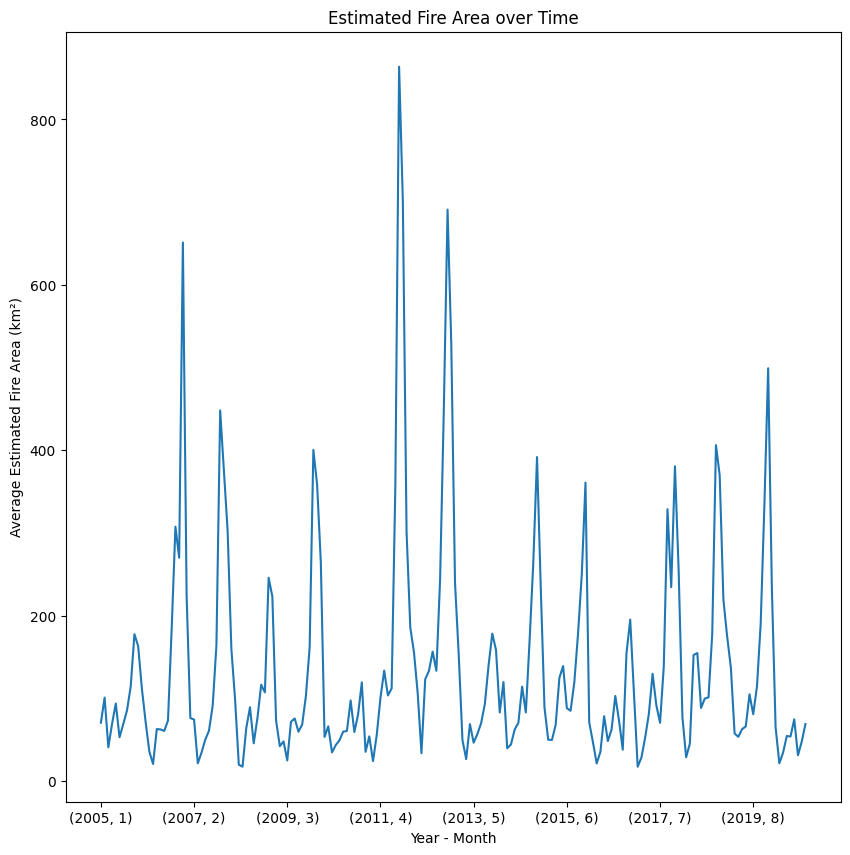

In [64]:
#1.2
plt.figure(figsize=(10,10))
df_group = df.groupby(['Year','Month'])["Estimated_fire_area"].mean()
#df_group
df_group.plot(x=df_group.index, y=df_group.values)
plt.xlabel('Year - Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

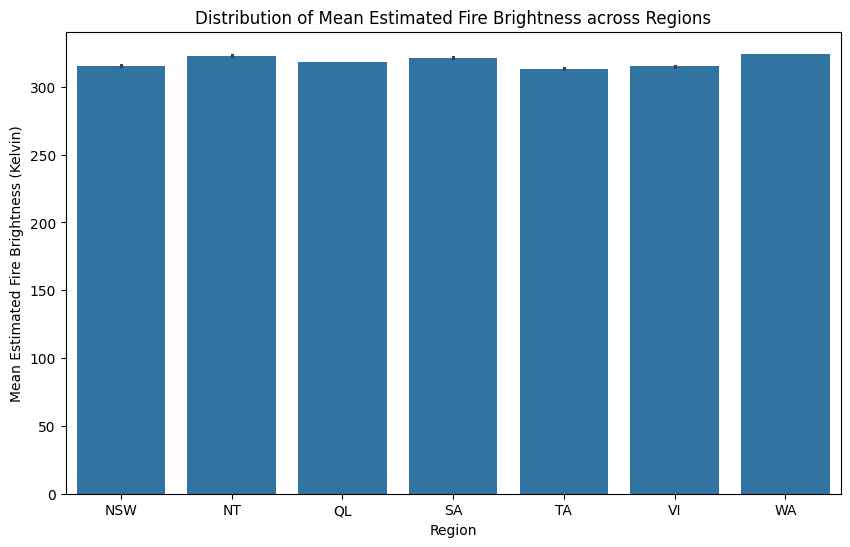

In [73]:
#1.3
plt.figure(figsize=(10,6))
df['Region'].unique()
sns.barplot(x=df['Region'],y=df["Mean_estimated_fire_brightness"])
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

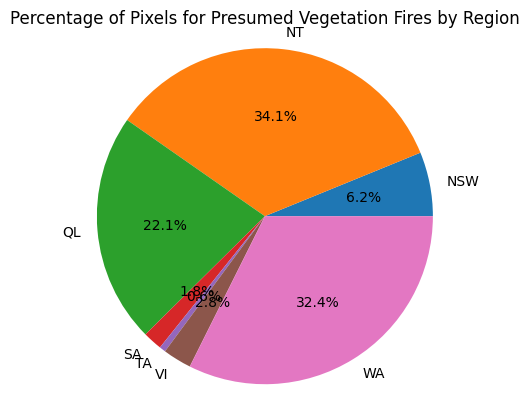

In [78]:
#1.4
fire_regions_sum = df.groupby('Region')['Count'].sum()
fire_regions_sum
plt.pie(fire_regions_sum, labels = fire_regions_sum.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

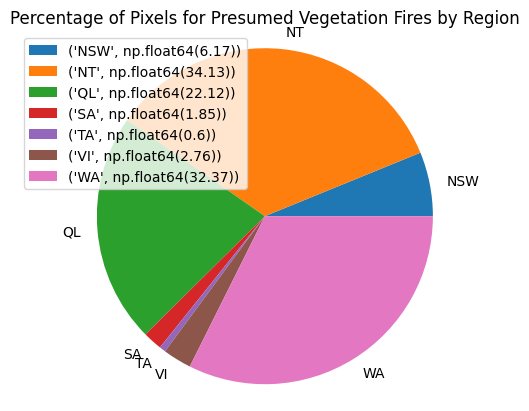

In [83]:
#1.5
fire_regions_sum = df.groupby('Region')['Count'].sum()
fire_regions_sum
plt.pie(fire_regions_sum, labels = fire_regions_sum.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend([(i,round(k/fire_regions_sum.sum()*100,2)) for i,k in zip(fire_regions_sum.index, fire_regions_sum)])
plt.show()

Text(0.5, 1.0, 'Histogram of Mean Estimated Fire Brightness')

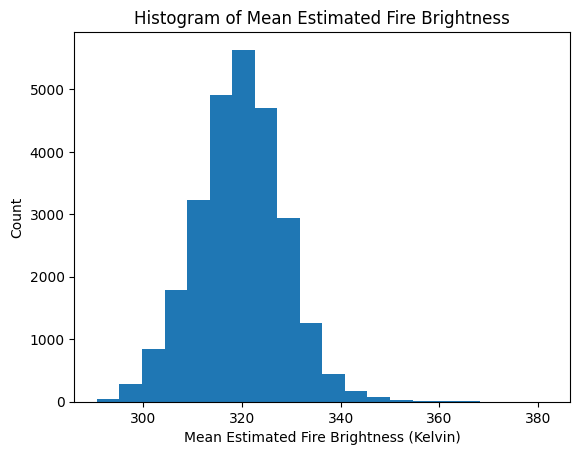

In [82]:
plt.hist(df["Mean_estimated_fire_brightness"], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')

<Axes: xlabel='Mean_estimated_fire_brightness', ylabel='Count'>

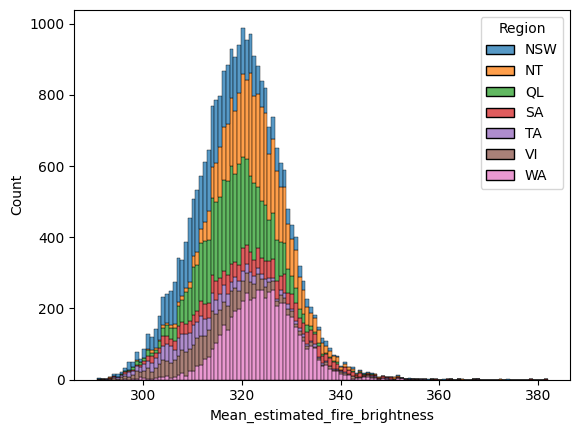

In [87]:
#1.7
sns.histplot(x=df["Mean_estimated_fire_brightness"], hue=df['Region'], multiple='stack')

Text(0.5, 1.0, 'Mean Estimated Fire Radiative Power vs. Mean Confidence')

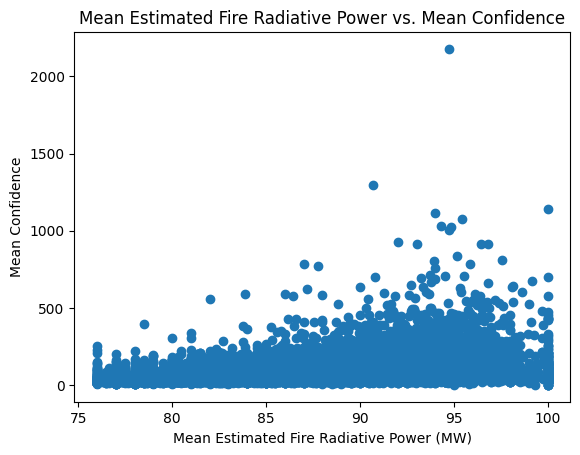

In [93]:
#1.8
plt.scatter(y = df['Mean_estimated_fire_radiative_power'], x= df['Mean_confidence'])
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')

In [94]:
#1.9
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [101]:
australia_map = folium.Map(location=[-25,135], zoom_start=4)
regions = folium.map.FeatureGroup()

for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    regions.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
australia_map.add_child(regions)



australia_map